# Ocean transports and maps

Transports in the climate system are often represented as gridded vector fields (e.g. on a `C-grid`) and integrated across `grid edge paths` that e.g. (1) connect location pairs or (2) tracks latitude circles. For more detail, please refer to [Forget et al, 2015](https://doi.org/10.5194/gmd-8-3071-2015) (incl. appendices)

### Read grid & transports from file

1. pre-requisites
2. read variables

In [1]:
#]add MITgcmTools#master

In [2]:
using MeshArrays, Plots, Statistics, MITgcmTools
include(joinpath(dirname(pathof(MeshArrays)),"../examples/Plots.jl"))
include("helper_functions.jl");

get_grid_if_needed()
Γ=GridLoad(GridSpec("LatLonCap","../inputs/GRID_LLC90/"))
(Tx,Ty,τx,τy,η)=trsp_read("LatLonCap","../inputs/GRID_LLC90/");

### Integrate transport across latitude lines

1. `LatitudeCircles` computes `grid edge path`s that track latitude circles
2. `ThroughFlow` integrates transports accross the specified `grid edge path`s
3. Plot integrated meridional transport in `Sverdrup` units

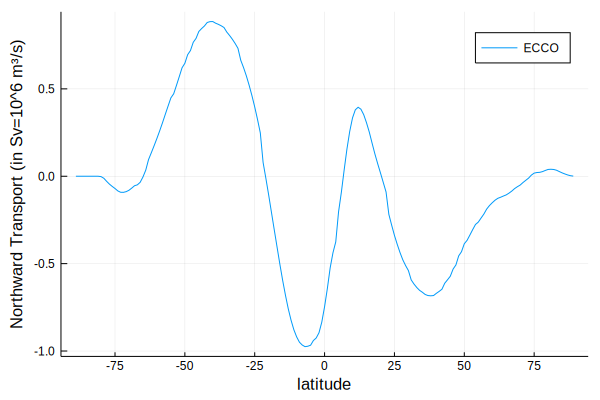

In [3]:
uv=Dict("U"=>Tx,"V"=>Ty,"dimensions"=>["x","y"])
L=-89.0:89.0; LC=LatitudeCircles(L,Γ)

T=Array{Float64,1}(undef,length(LC))
[T[i]=1e-6*ThroughFlow(uv,LC[i],Γ) for i=1:length(LC)]

plot(L,T,xlabel="latitude",ylabel="Northward Transport (in Sv=10^6 m³/s)",label="ECCO")

## Transport Directions

1. `u,v` are oriented in the `Eastward,Northward` directions
2. `uC,vC` are oriented along the `x,y` directions of each subdomain

In [4]:
u,v,uC,vC=rotate_uv(uv,Γ);

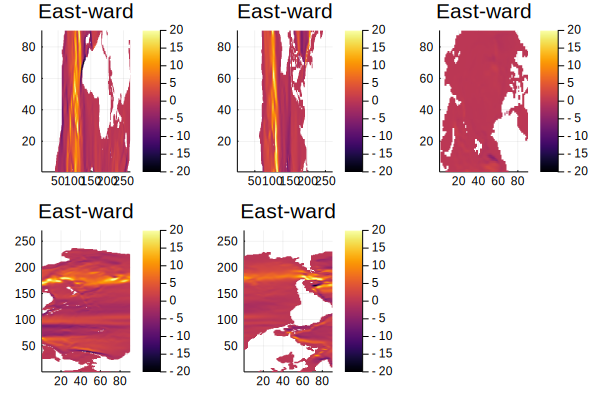

In [5]:
heatmap(u,clims=(-20.0,20.0),title="East-ward")
#heatmap(v,clims=(-20.0,20.0),title="North-ward")

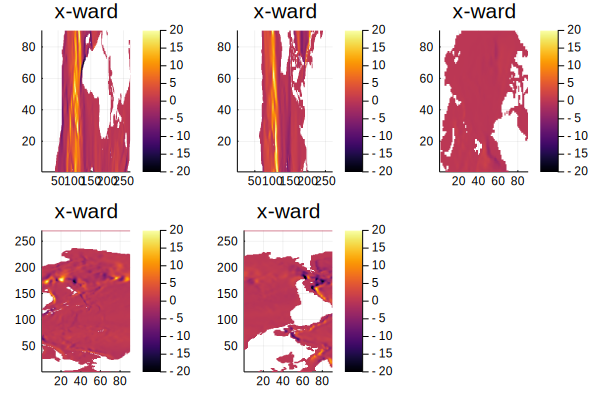

In [6]:
heatmap(uC,clims=(-20.0,20.0),title="x-ward")
#heatmap(vC,clims=(-20.0,20.0),title="y-ward")

### Global Maps

1. interpolate `u,v` to a `1/2 x 1/2` degree grid for plotting
2. map out the Eastward,Northward transport components

In [7]:
uI,vI,lon,lat=interp_uv(u,v);

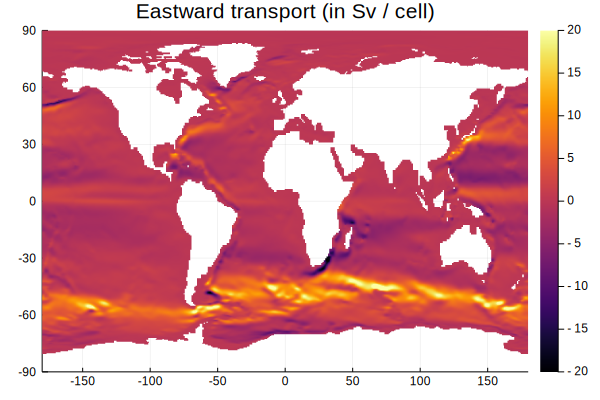

In [8]:
heatmap(lon,lat,uI,clims=(-20.0,20.0),
    title="Eastward transport (in Sv / cell)")

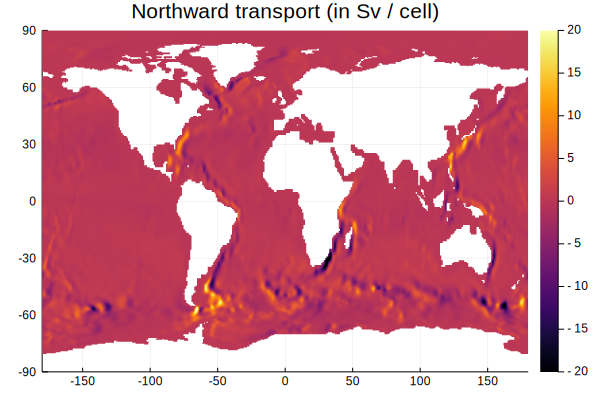

In [9]:
heatmap(lon,lat,vI,clims=(-20.0,20.0),
    title="Northward transport (in Sv / cell)")